# Sample Credit Card Transactions Processing and Loading
Below is an example of how credit card transactions are transformed into a format that can be loaded into the "spend_save" database, then loaded into the database. May 2023 transactions are loaded and processed in this example. Due to the sensitive nature of this data, any amounts have been changed to a random number and any sensitive material (such as bank account numbers) have been removed. However, this data still closely resembles real transactions.

This example will show the input transactions CSV file, the output DataFrames generated via the "cc_file_cleanup" function, and how the data is loaded into the database using the "to_spend_save" function. To see the details of the functions, view [transactions_processing_functions](transactions_processing_functions.py)
and navigate to the desired function.

## Input
Input file in the form of CSV containing all May 2023 credit card account transactions.

In [1]:
# Import function and needed packages
import pandas as pd
from transactions_processing_functions import cc_file_cleanup, to_spend_save

In [2]:
# Raw input file extracted bank website
input_file = r"C:\Users\weism\OneDrive\life stuff\Personal Projects\Personal Finance Database\bank data\cc_transactions_may2023.CSV"
pd.read_csv(input_file, encoding='unicode_escape', index_col=False)

,Transaction Date,Post Date,Description,Category,Type,Amount,Memo
0,5/29/2023,5/31/2023,Payment Thank You-Mobile,NaN,Payment,78.09,NaN
1,5/28/2023,5/30/2023,TARGET 8905058,Shopping,Sale,-62.13,NaN
2,5/28/2023,5/30/2023,TARGET 789829,Shopping,Sale,-31.13,NaN
3,5/27/2023,5/30/2023,DUNKIN #4828732,Food & Drink,Sale,-4.50,NaN
4,5/28/2023,5/30/2023,LAX PARKING,Travel,Sale,-91.40,NaN
5,5/26/2023,5/29/2023,SEATTLE HOUSE RESTAURA,Food & Drink,Sale,-67.32,NaN
6,5/26/2023,5/29/2023,TST* Johnny's Tavern,Food & Drink,Sale,-13.71,NaN
7,5/27/2023,5/28/2023,Payment Thank You-Mobile,NaN,Payment,45.93,NaN
8,5/26/2023,5/28/2023,LINK LIGHT RALE,Travel,Sale,-67.65,NaN
9,5/25/2023,5/28/2023,TARGET 542128,Shopping,Sale,-30.17,NaN


## Processing
Processing the input CSV file using cc_file_cleanup. This function processes transactions by reading the category of the transactions assigned by the bank and returns the "category_id", which is needed to be loaded into the database. Transactions that are able to be automatically processed are loaded into a Dataframe called "cc_df" and other transactions needing manual review are loaded into "cc_review_df". See the full function docstring below"

```
Cleans up a credit card transactions, performs data transformations, and returns the cleaned dataframes.

Args:
    spend_save_password (str): Password to spend_save server. Needed to retrieve categories and category_ids 
                               from database.
    csv_file (str): input credit card transactions as CSV.

Returns:
    tuple: A tuple containing two pandas DataFrames:
        - cc_df: The cleaned and transformed credit card transactions DataFrame.
        - cc_review_df: The DataFrame containing transactions that need manual review for assignment of
                        transaction_type_id and category_id.
```

In [4]:
# Process the input CSV file using cc_file_cleanup.
# Note: Database server password has been replaced with *** after running the below code.
cc_df, cc_review_df = cc_file_cleanup("***", input_file)

Transactions successfully transformed.The following transactions need to be reviewed.Once values have been assigned to transaction_type_id and category_id, use to_spend_save() to update database.
Empty DataFrame
Columns: [account_id, transaction_type_id, category_id, short_date, transaction_description, transaction_amount]
Index: []


See the output of "cc_review_df" and "cc_df" below. Since all transactions were able to be processed by the function, "cc_review_df" in empty. These transactions would be manually assigned a transaction_type_id and category_id (if necessary), then appended back to the "cc_df".

In [5]:
# Transactions needing review (if any)
cc_review_df

,account_id,transaction_type_id,category_id,short_date,transaction_description,transaction_amount


In [6]:
# Transactions that were able to be processed automatically
# Note: Some transactions have a null category_id. This is because only purchases are assigned a category.
cc_df

,account_id,transaction_type_id,category_id,short_date,transaction_description,transaction_amount
0,1,7,<NA>,2023-05-29,payment thank you-mobile,78.09
1,1,1,16,2023-05-28,target 8905058,-62.13
2,1,1,16,2023-05-28,target 789829,-31.13
3,1,1,6,2023-05-27,dunkin #4828732,-4.50
4,1,1,17,2023-05-28,lax parking,-91.40
5,1,1,6,2023-05-26,seattle house restaura,-67.32
6,1,1,6,2023-05-26,tst* johnny's tavern,-13.71
7,1,7,<NA>,2023-05-27,payment thank you-mobile,45.93
8,1,1,17,2023-05-26,link light rale,-67.65
9,1,1,16,2023-05-25,target 542128,-30.17


In [7]:
# cc_review_df would be updated manually and appended to cc_df for loading into database
cc_df = pd.concat([cc_df, cc_review_df])

In [9]:
# review_df would be updated manually and appended to cc_df for loading into database
cc_df = pd.concat([cc_df, cc_review_df])

### Loading Data into Database

After extracting and processing the data from the bank website, the data is then loaded into the database using the "to_spend_save" function. This function connects and loads the DataFrame into the "spend_save" database using sqlalchemy. The function's argument include:
1. **df** (pandas.DataFrame): A DataFrame to be loaded into the database
2. **data_source** (str): The name of the data source (savings, checking, or credit card data)
3. **password** (str): The password of the MySQL database server

Once the data has been successfully loaded into the database, a CSV containing the loaded data is saved as backup.

Note: Database server password has been replaced with *** after running the below code.

In [11]:
# Load data into spend_save
# to_spend_save(cc_df, "cc", "***")

cc data successfully loaded into spend_save MySQL database
CSV file saved as cc_2023-06-19.csv


Transactions can now be seen in MySQL database

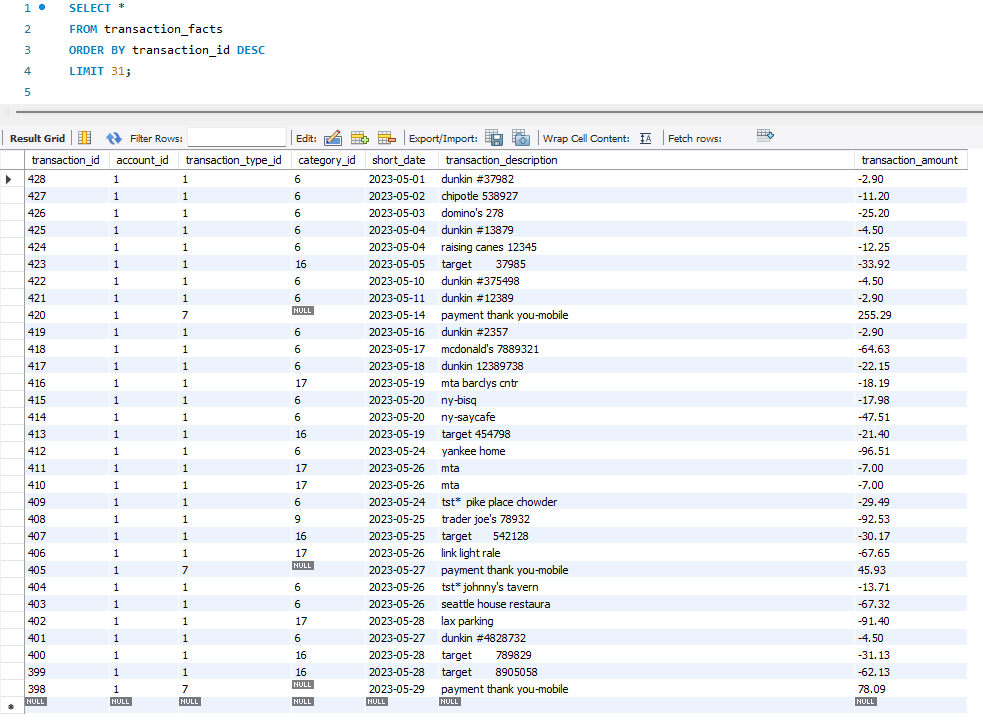